In [7]:
from astropy.table import Table, vstack
import matplotlib.pyplot as plt
import numpy as np
import pyphot

lib = pyphot.get_library()

<>:36: SyntaxWarning: invalid escape sequence '\l'
<>:36: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_336818/2806522822.py:36: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel('$\log g$')


110 79217.47582723375 3416.8585469391273 8.8399086 8.7715295
116 79683.24282162874 3023.862227104314 8.9581272 8.8976667
123 79179.90931178578 3363.496654126076 9.1218046 9.0728359
129 79300.69617978985 4759.277192949766 9.3037376 9.2661042


Text(0.5, 1.0, 'Ultramassive CO Hrich')

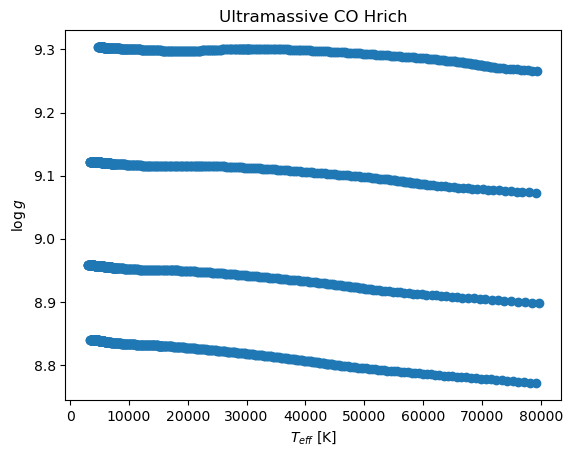

In [8]:
core = 'CO'
layer = 'Hrich'
table = Table()

masses = ['110', '116', '123', '129'] # solar masses (e.g. 1.10 Msun)
for mass in masses:
    # read in the table from the correct file
    path = f'./high_mass/{core}_{mass}_{layer}_0_02.dat'
    temp_table = Table.read(path, format='ascii')

    # put the columns into a pyphot-readable standard
    temp_table.rename_columns(['Teff', 'logg(CGS)'], ['teff', 'logg'])
    #temp_table.remove_columns(['g_1', 'r_1', 'i_1', 'z_1', 'y', 'U', 'B',\
    #                    'V', 'R', 'I', 'J', 'H', 'K', 'FUV', 'NUV'])
    
    mag_cols = ['Gaia_G_mag', 'Gaia_BP_mag', 'Gaia_RP_mag', 'SDSS_u_mag', 'SDSS_g_mag', 'SDSS_r_mag', 'SDSS_i_mag', 'SDSS_z_mag', 
                'PS1_g_mag', 'PS1_r_mag', 'PS1_i_mag', 'PS1_z_mag', 'PS1_y_mag', '2MASS_J_mag', '2MASS_H_mag', '2MASS_Ks_mag', 
                'GALEX_FUV_mag', 'GALEX_NUV_mag']
    temp_table.rename_columns(['G3', 'Bp3', 'Rp3', 'u', 'g', 'r', 'i', 'z', 'PS1_g', 'PS1_r', 'PS1_i', 'PS1_z', 'PS1_y',
                                'J', 'H', 'K', 'FUV', 'NUV'], mag_cols)
    
    # now convert from absolute magnitude to surface flux
    for col in mag_cols:
        temp_table[col[:-4]] = (4*np.pi)**-1 * 10**(-0.4*(temp_table[col] + lib[col[:-4]].Vega_zero_mag)) * ((10*3.086775e16) / (6.957e8*temp_table['R/R_sun']))**2
    
    # stack the tables
    table = vstack([table, temp_table])
    print(mass, max(temp_table['teff']), min(temp_table['teff']), max(temp_table['logg']), min(temp_table['logg']))


table.rename_column('R/R_sun', 'Radius')
table.write('CO_Hrich_Massive.csv', overwrite=True)

plt.scatter(table['teff'], table['logg'])
plt.xlabel('$T_{eff}$ [K]')
plt.ylabel('$\log g$')
plt.title('Ultramassive CO Hrich')

<>:34: SyntaxWarning: invalid escape sequence '\l'
<>:34: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_336818/3161917254.py:34: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel('$\log g$')


110 79897.46496958123 4040.675738481134 8.8431936 8.7890218
116 79260.17009321394 4181.422001033554 8.9618759 8.9149192
123 79104.64757143418 4114.082534241912 9.1261759 9.0882501
129 79187.20238679287 4321.972507845209 9.3102738 9.280276


(8.85, 9.28)

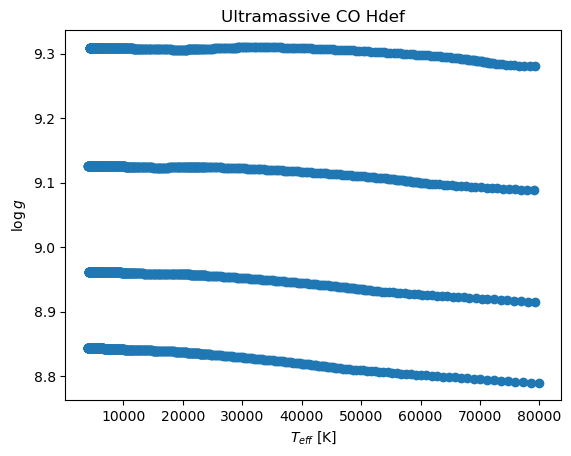

In [9]:
core = 'CO'
layer = 'Hdef'
table = Table()

masses = ['110', '116', '123', '129'] # solar masses (e.g. 1.10 Msun)
for mass in masses:
    # read in the table from the correct file
    path = f'.//high_mass/{core}_{mass}_{layer}_0_02.dat'
    temp_table = Table.read(path, format='ascii')

    # put the columns into a pyphot-readable standard
    temp_table.rename_columns(['Teff', 'logg(CGS)'], ['teff', 'logg'])
    
    mag_cols = ['Gaia_G_mag', 'Gaia_BP_mag', 'Gaia_RP_mag', 'SDSS_u_mag', 'SDSS_g_mag', 'SDSS_r_mag', 'SDSS_i_mag', 'SDSS_z_mag', 
                'PS1_g_mag', 'PS1_r_mag', 'PS1_i_mag', 'PS1_z_mag', 'PS1_y_mag', '2MASS_J_mag', '2MASS_H_mag', '2MASS_Ks_mag', 
                'GALEX_FUV_mag', 'GALEX_NUV_mag']
    temp_table.rename_columns(['G3', 'Bp3', 'Rp3', 'u', 'g', 'r', 'i', 'z', 'PS1_g', 'PS1_r', 'PS1_i', 'PS1_z', 'PS1_y',
                                'J', 'H', 'K', 'FUV', 'NUV'], mag_cols)
    
    # now convert from absolute magnitude to surface flux
    for col in mag_cols:
        temp_table[col[:-4]] = (4*np.pi)**-1 * 10**(-0.4*(temp_table[col] + lib[col[:-4]].Vega_zero_mag)) * ((10*3.086775e16) / (6.957e8*temp_table['R/R_sun']))**2
    
    # stack the tables
    table = vstack([table, temp_table])
    print(mass, max(temp_table['teff']), min(temp_table['teff']), max(temp_table['logg']), min(temp_table['logg']))


table.rename_column('R/R_sun', 'Radius')
table.write('CO_Hdef_Massive.csv', overwrite=True)

plt.scatter(table['teff'], table['logg'])
plt.xlabel('$T_{eff}$ [K]')
plt.ylabel('$\log g$')
plt.title('Ultramassive CO Hdef')

8.85, 9.28

<>:34: SyntaxWarning: invalid escape sequence '\l'
<>:34: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_336818/1591023690.py:34: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel('$\log g$')


110 79451.29860500088 3028.0427342838675 8.8513327 8.7800099
116 78821.19230060739 3021.0645167041585 8.9816282 8.9135452
123 79554.72887708576 3376.906219853223 9.1588248 9.0843512
129 79876.49506080062 3742.1052650799193 9.38202 9.3038225


Text(0.5, 1.0, 'Ultramassive ONe Hrich')

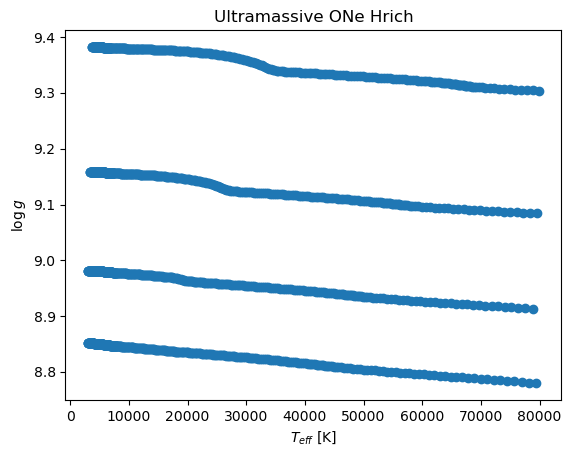

In [10]:
core = 'ONe'
layer = 'Hrich'
table = Table()

masses = ['110', '116', '123', '129'] # solar masses (e.g. 1.10 Msun)
for mass in masses:
    # read in the table from the correct file
    path = f'.//high_mass/{core}_{mass}_{layer}_0_02.dat'
    temp_table = Table.read(path, format='ascii')

    # put the columns into a pyphot-readable standard
    temp_table.rename_columns(['Teff', 'logg(CGS)'], ['teff', 'logg'])
    
    mag_cols = ['Gaia_G_mag', 'Gaia_BP_mag', 'Gaia_RP_mag', 'SDSS_u_mag', 'SDSS_g_mag', 'SDSS_r_mag', 'SDSS_i_mag', 'SDSS_z_mag', 
                'PS1_g_mag', 'PS1_r_mag', 'PS1_i_mag', 'PS1_z_mag', 'PS1_y_mag', '2MASS_J_mag', '2MASS_H_mag', '2MASS_Ks_mag', 
                'GALEX_FUV_mag', 'GALEX_NUV_mag']
    temp_table.rename_columns(['G3', 'Bp3', 'Rp3', 'u', 'g', 'r', 'i', 'z', 'PS1_g', 'PS1_r', 'PS1_i', 'PS1_z', 'PS1_y',
                                'J', 'H', 'K', 'FUV', 'NUV'], mag_cols)
    
    # now convert from absolute magnitude to surface flux
    for col in mag_cols:
        temp_table[col[:-4]] = (4*np.pi)**-1 * 10**(-0.4*(temp_table[col] + lib[col[:-4]].Vega_zero_mag)) * ((10*3.086775e16) / (6.957e8*temp_table['R/R_sun']))**2
    
    # stack the tables
    table = vstack([table, temp_table])
    print(mass, max(temp_table['teff']), min(temp_table['teff']), max(temp_table['logg']), min(temp_table['logg']))


table.rename_column('R/R_sun', 'Radius')
table.write('ONe_Hrich_Massive.csv', overwrite=True)

plt.scatter(table['teff'], table['logg'])
plt.xlabel('$T_{eff}$ [K]')
plt.ylabel('$\log g$')
plt.title('Ultramassive ONe Hrich')

<>:34: SyntaxWarning: invalid escape sequence '\l'
<>:34: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_336818/137603645.py:34: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel('$\log g$')


110 78848.23932291634 4008.5933345748745 8.854817 8.798564
116 79342.5218275885 4000.2579777215406 8.9853381 8.9301551
123 79225.68447655397 4222.192208709281 9.1630382 9.0985394
129 79774.85068590299 4005.0874202477985 9.383884 9.317871


Text(0.5, 1.0, 'Ultramassive ONe Hdef')

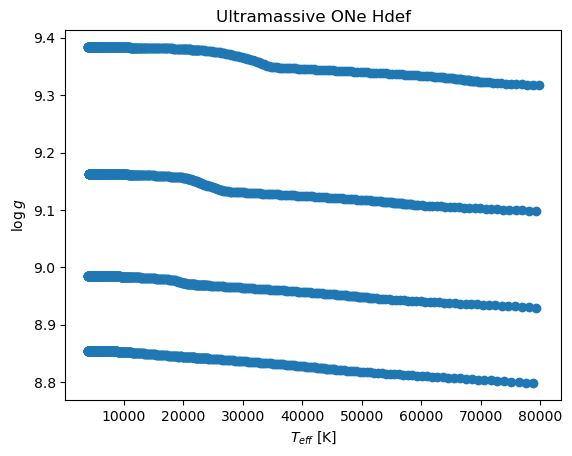

In [11]:
core = 'ONe'
layer = 'Hdef'
table = Table()

masses = ['110', '116', '123', '129'] # solar masses (e.g. 1.10 Msun)
for mass in masses:
    # read in the table from the correct file
    path = f'.//high_mass/{core}_{mass}_{layer}_0_02.dat'
    temp_table = Table.read(path, format='ascii')

    # put the columns into a pyphot-readable standard
    temp_table.rename_columns(['Teff', 'logg(CGS)'], ['teff', 'logg'])

    mag_cols = ['Gaia_G_mag', 'Gaia_BP_mag', 'Gaia_RP_mag', 'SDSS_u_mag', 'SDSS_g_mag', 'SDSS_r_mag', 'SDSS_i_mag', 'SDSS_z_mag', 
                'PS1_g_mag', 'PS1_r_mag', 'PS1_i_mag', 'PS1_z_mag', 'PS1_y_mag', '2MASS_J_mag', '2MASS_H_mag', '2MASS_Ks_mag', 
                'GALEX_FUV_mag', 'GALEX_NUV_mag']
    temp_table.rename_columns(['G3', 'Bp3', 'Rp3', 'u', 'g', 'r', 'i', 'z', 'PS1_g', 'PS1_r', 'PS1_i', 'PS1_z', 'PS1_y',
                                'J', 'H', 'K', 'FUV', 'NUV'], mag_cols)

    # now convert from absolute magnitude to surface flux
    for col in mag_cols:
        temp_table[col[:-4]] = (4*np.pi)**-1 * 10**(-0.4*(temp_table[col] + lib[col[:-4]].Vega_zero_mag)) * ((10*3.086775e16) / (6.957e8*temp_table['R/R_sun']))**2
    
    # stack the tables
    table = vstack([table, temp_table])

    print(mass, max(temp_table['teff']), min(temp_table['teff']), max(temp_table['logg']), min(temp_table['logg']))

table.rename_column('R/R_sun', 'Radius')
table.write('ONe_Hdef_Massive.csv', overwrite=True)

plt.scatter(table['teff'], table['logg'])
plt.xlabel('$T_{eff}$ [K]')
plt.ylabel('$\log g$')
plt.title('Ultramassive ONe Hdef')

<>:7: SyntaxWarning: invalid escape sequence '\l'
<>:7: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_336818/3347388928.py:7: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel('$\log g$')


Text(0.5, 1.0, 'La Plata Grid Used In Raddi+2022')

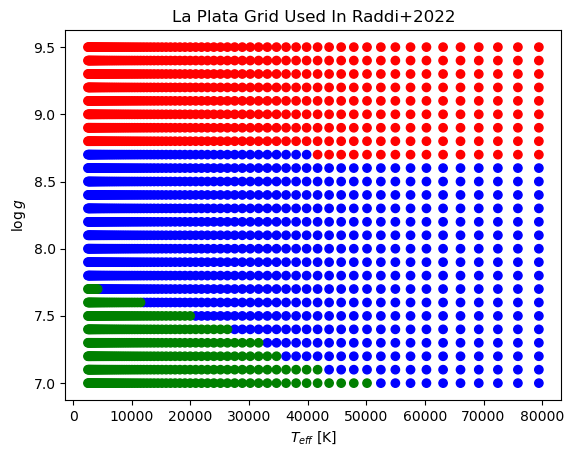

In [12]:
import pandas as pd

table = pd.read_csv('allwd_Hrich.csv')

plt.scatter(table['teff'], table['logg'], c=table['core'].map({'CO': 'blue', 'ONe': 'red', 'He': 'green'}))
plt.xlabel('$T_{eff}$ [K]')
plt.ylabel('$\log g$')
plt.title('La Plata Grid Used In Raddi+2022')

In [1]:
test = Table.read('DAwhitedwarfs_Z=0.02.dat', format='ascii')

NameError: name 'Table' is not defined

In [ ]:
test.rename_columns(['col1','col2','col3','col4','col5','col6',
                     'col7','col8','col9','col10','col11'],
                     ['logg','log(teff)','mWD','TpreWD(gyr)','R(Rsun)','core',
                     'log(L)','Mzams','Gaia_G','Gaia_BP','Gaia_RP'])

In [ ]:
test['teff'] = 10**test['log(teff)']

In [ ]:
test.write('allwd_Hdef.csv')